In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.DataFrame(np.random.randn(100, 4), columns='A B C D'.split())
df.head()

,A,B,C,D
0,-0.795780,1.267121,0.837961,0.870778
1,-0.479278,-1.140165,-1.687620,-1.768518
2,1.481683,0.469511,-1.286630,-0.602059
3,-0.307304,-0.702591,-0.829802,0.008401
4,0.278894,-0.405637,-1.202348,0.077063


In [3]:
df2 = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [32, 43, 50]})
df2.head()

,Category,Values
0,A,32
1,B,43
2,C,50


<Axes: >

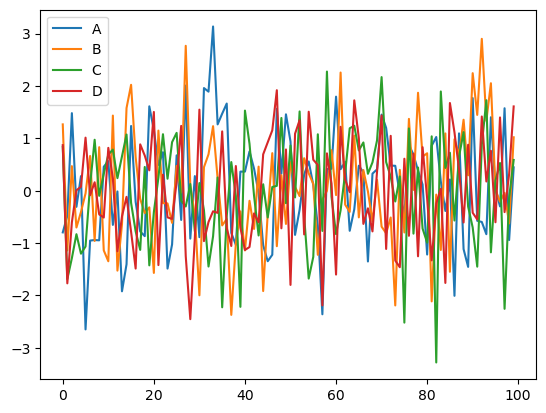

In [4]:
df.plot()

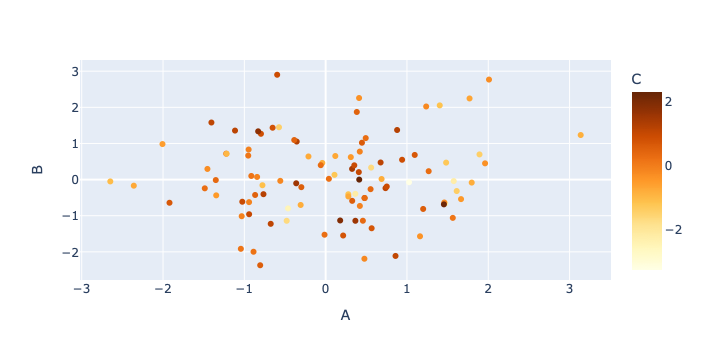

In [5]:
import plotly.express as px
# Create a scatter plot using columns 'A' and 'B' for the axes,
# and use the values in column 'C' to determine the color from the 'YlOrBr' scale.
fig = px.scatter(df, x='A', y='B', color='C', 
                 color_continuous_scale='YlOrBr',)
fig.show()

In [6]:
df3 = pd.DataFrame({'x': [1, 2, 3, 4, 5], 
                    'y': [10, 20, 30, 20, 10], 
                    'z': [5, 4, 3, 2, 1]})
df3.iplot(kind='surface', colorscale='ylorbr')

In [7]:
data = dict(type='choropleth', locations=['AZ', 'CA', 'NY'], locationmode='USA-states',
           colorscale='Portland', text=['Arizona', 'Cali', 'New York'],
           z=[1.0, 2.0, 3.0], colorbar={'title':'Colors'})
layout = dict(geo={'scope': 'usa'})
choromap = go.Figure(data=[data], layout=layout)
iplot = choromap
iplot

In [8]:
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [9]:
data = dict(type='choropleth', colorscale='Portland',
            locations=df['code'], locationmode='USA-states',
            z=df['total exports'], text=df['text'],
            colorbar={'title': 'Millions USD'},
            marker=dict(line=dict(color='rgb(255,255,255)', width=.5)))
layout = dict(geo=dict(scope='usa', showlakes=True, lakecolor='rgb(85,175,240)'))
choromap = go.Figure(data=[data], layout=layout)
iplot = choromap
iplot

In [10]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


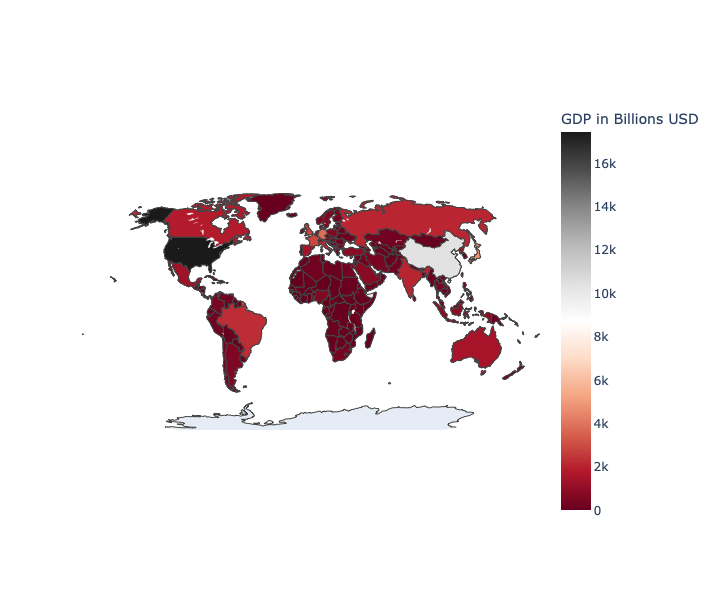

In [11]:
data = dict(type='choropleth', colorscale='RdGy',
            locations=df['CODE'],
            z=df['GDP (BILLIONS)'], text=df['COUNTRY'],
            colorbar={'title': 'GDP in Billions USD'})
layout = dict(geo=dict(showframe=False, projection={'type': 'natural earth'}),
              width=800, height=600)
choromap = go.Figure(data=[data], layout=layout)
iplot = choromap
iplot